In [1]:
# Do not modify this cell!

# Import necessary libraries
# DO NOT IMPORT OTHER LIBRARIES - This will break the autograder.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import itertools
from tqdm import tqdm

from rl_glue import RLGlue
from pendulum_env import PendulumEnvironment
from agent import BaseAgent
import plot_script
import tiles3 as tc

In [2]:
# -----------
# Graded Cell
# -----------
class PendulumTileCoder:
    def __init__(self, iht_size=4096, num_tilings=32, num_tiles=8):
        """
        Initializes the MountainCar Tile Coder
        Initializers:
        iht_size -- int, the size of the index hash table, typically a power of 2
        num_tilings -- int, the number of tilings
        num_tiles -- int, the number of tiles. Here both the width and height of the tiles are the same
                            
        Class Variables:
        self.iht -- tc.IHT, the index hash table that the tile coder will use
        self.num_tilings -- int, the number of tilings the tile coder will use
        self.num_tiles -- int, the number of tiles the tile coder will use
        """
        
        self.num_tilings = num_tilings
        self.num_tiles = num_tiles 
        self.iht = tc.IHT(iht_size)
    
    def get_tiles(self, angle, ang_vel):
        """
        Takes in an angle and angular velocity from the pendulum environment
        and returns a numpy array of active tiles.
        
        Arguments:
        angle -- float, the angle of the pendulum between -np.pi and np.pi
        ang_vel -- float, the angular velocity of the agent between -2*np.pi and 2*np.pi
        
        returns:
        tiles -- np.array, active tiles
        
        """
        
        ### Use the ranges above and scale the angle and angular velocity between [0, 1]
        # then multiply by the number of tiles so they are scaled between [0, self.num_tiles]
        
        angle_scaled = 0
        ang_vel_scaled = 0
        
        # ----------------
        # your code here
        
        
        angle_MIN = -np.pi
        angle_MAX = np.pi
        ang_vel_MIN = -2*np.pi
        ang_vel_MAX = 2*np.pi
        
        
        angle_scaled =  self.num_tiles*(angle-angle_MIN)/(angle_MAX-angle_MIN)
        ang_vel_scaled = self.num_tiles*(ang_vel-ang_vel_MIN) / (ang_vel_MAX-ang_vel_MIN)
        
        # ----------------
        
        # Get tiles by calling tc.tileswrap method
        # wrapwidths specify which dimension to wrap over and its wrapwidth
        tiles = tc.tileswrap(self.iht, self.num_tilings, [angle_scaled, ang_vel_scaled], wrapwidths=[self.num_tiles, False])
                    
        return np.array(tiles)

In [3]:
# -----------
# Tested Cell
# -----------
# The contents of the cell will be tested by the autograder.
# If they do not pass here, they will not pass there.

## Test Code for PendulumTileCoder ##
# Your tile coder should also work for other num. tilings and num. tiles
angles = np.linspace(-np.pi, np.pi, num=5)
vels = np.linspace(-2 * np.pi, 2 * np.pi, num=5)
test_obs = list(itertools.product(angles, vels))

pdtc = PendulumTileCoder(iht_size=4096, num_tilings=8, num_tiles=2)

result=[]
for obs in test_obs:
    angle, ang_vel = obs
    tiles = pdtc.get_tiles(angle=angle, ang_vel=ang_vel)
    result.append(tiles)
    
expected = np.array([
    [0, 1, 2, 3, 4, 5, 6, 7],
    [0, 1, 8, 3, 9, 10, 6, 11],
    [12, 13, 8, 14, 9, 10, 15, 11],
    [12, 13, 16, 14, 17, 18, 15, 19],
    [20, 21, 16, 22, 17, 18, 23, 19],
    [0, 1, 2, 3, 24, 25, 26, 27],
    [0, 1, 8, 3, 28, 29, 26, 30],
    [12, 13, 8, 14, 28, 29, 31, 30],
    [12, 13, 16, 14, 32, 33, 31, 34],
    [20, 21, 16, 22, 32, 33, 35, 34],
    [36, 37, 38, 39, 24, 25, 26, 27],
    [36, 37, 40, 39, 28, 29, 26, 30],
    [41, 42, 40, 43, 28, 29, 31, 30],
    [41, 42, 44, 43, 32, 33, 31, 34],
    [45, 46, 44, 47, 32, 33, 35, 34],
    [36, 37, 38, 39, 4, 5, 6, 7],
    [36, 37, 40, 39, 9, 10, 6, 11],
    [41, 42, 40, 43, 9, 10, 15, 11],
    [41, 42, 44, 43, 17, 18, 15, 19],
    [45, 46, 44, 47, 17, 18, 23, 19],
    [0, 1, 2, 3, 4, 5, 6, 7],
    [0, 1, 8, 3, 9, 10, 6, 11],
    [12, 13, 8, 14, 9, 10, 15, 11],
    [12, 13, 16, 14, 17, 18, 15, 19],
    [20, 21, 16, 22, 17, 18, 23, 19],
])

assert np.all(expected == np.array(result))

In [4]:
# -----------
# Graded Cell
# -----------

def compute_softmax_prob(actor_w, tiles):
    """
    Computes softmax probability for all actions
    
    Args:
    actor_w - np.array, an array of actor weights
    tiles - np.array, an array of active tiles
    
    Returns:
    softmax_prob - np.array, an array of size equal to num. actions, and sums to 1.
    """
    
    # First compute the list of state-action preferences (1~2 lines)
    # state_action_preferences = ? (list of size 3)
    state_action_preferences = []
    # ----------------
    # your code here
    
    for action in range(len(actor_w)):
        state_action_preferences.append(actor_w[action][tiles].sum())
    
    # ----------------
    
    # Set the constant c by finding the maximum of state-action preferences (use np.max) (1 line)
    # c = ? (float)
    # ----------------
    # your code here
    
    c = np.max(state_action_preferences)
    
    # ----------------
    
    # Compute the numerator by subtracting c from state-action preferences and exponentiating it (use np.exp) (1 line)
    # numerator = ? (list of size 3)
    # ----------------
    # your code here
    
    numerator = np.exp( state_action_preferences - c )
    
    # ----------------
    
    # Next compute the denominator by summing the values in the numerator (use np.sum) (1 line)
    # denominator = ? (float)
    # ----------------
    # your code here
    
    denominator = np.sum(numerator)
    
    # ----------------
    
    
    # Create a probability array by dividing each element in numerator array by denominator (1 line)
    # We will store this probability array in self.softmax_prob as it will be useful later when updating the Actor
    # softmax_prob = ? (list of size 3)
    # ----------------
    # your code here
    
    softmax_prob = numerator / denominator
    
    # ----------------
    
    return softmax_prob

In [5]:
# -----------
# Tested Cell
# -----------
# The contents of the cell will be tested by the autograder.
# If they do not pass here, they will not pass there.

# set tile-coder
iht_size = 4096
num_tilings = 8
num_tiles = 8
test_tc = PendulumTileCoder(iht_size=iht_size, num_tilings=num_tilings, num_tiles=num_tiles)

num_actions = 3
actions = list(range(num_actions))
actor_w = np.zeros((len(actions), iht_size))

# setting actor weights such that state-action preferences are always [-1, 1, 2]
actor_w[0] = -1./num_tilings
actor_w[1] = 1./num_tilings
actor_w[2] = 2./num_tilings

# obtain active_tiles from state
state = [-np.pi, 0.]
angle, ang_vel = state
active_tiles = test_tc.get_tiles(angle, ang_vel)

# compute softmax probability
softmax_prob = compute_softmax_prob(actor_w, active_tiles) 
print('softmax probability: {}'.format(softmax_prob))

assert np.allclose(softmax_prob, [0.03511903, 0.25949646, 0.70538451])

softmax probability: [0.03511903 0.25949646 0.70538451]


In [6]:
# -----------
# Graded Cell
# -----------

class ActorCriticSoftmaxAgent(BaseAgent): 
    def __init__(self):
        self.rand_generator = None

        self.actor_step_size = None
        self.critic_step_size = None
        self.avg_reward_step_size = None

        self.tc = None

        self.avg_reward = None
        self.critic_w = None
        self.actor_w = None

        self.actions = None

        self.softmax_prob = None
        self.prev_tiles = None
        self.last_action = None
    
    def agent_init(self, agent_info={}):
        """Setup for the agent called when the experiment first starts.

        Set parameters needed to setup the semi-gradient TD(0) state aggregation agent.

        Assume agent_info dict contains:
        {
            "iht_size": int
            "num_tilings": int,
            "num_tiles": int,
            "actor_step_size": float,
            "critic_step_size": float,
            "avg_reward_step_size": float,
            "num_actions": int,
            "seed": int
        }
        """

        # set random seed for each run
        self.rand_generator = np.random.RandomState(agent_info.get("seed")) 

        iht_size = agent_info.get("iht_size")
        num_tilings = agent_info.get("num_tilings")
        num_tiles = agent_info.get("num_tiles")

        # initialize self.tc to the tile coder we created
        self.tc = PendulumTileCoder(iht_size=iht_size, num_tilings=num_tilings, num_tiles=num_tiles)

        # set step-size accordingly (we normally divide actor and critic step-size by num. tilings (p.217-218 of textbook))
        self.actor_step_size = agent_info.get("actor_step_size")/num_tilings
        self.critic_step_size = agent_info.get("critic_step_size")/num_tilings
        self.avg_reward_step_size = agent_info.get("avg_reward_step_size")

        self.actions = list(range(agent_info.get("num_actions")))

        # Set initial values of average reward, actor weights, and critic weights
        # We initialize actor weights to three times the iht_size. 
        # Recall this is because we need to have one set of weights for each of the three actions.
        self.avg_reward = 0.0
        self.actor_w = np.zeros((len(self.actions), iht_size))
        self.critic_w = np.zeros(iht_size)

        self.softmax_prob = None
        self.prev_tiles = None
        self.last_action = None
    
    def agent_policy(self, active_tiles):
        """ policy of the agent
        Args:
            active_tiles (Numpy array): active tiles returned by tile coder
            
        Returns:
            The action selected according to the policy
        """
        
        # compute softmax probability
        softmax_prob = compute_softmax_prob(self.actor_w, active_tiles)
        
        # Sample action from the softmax probability array
        # self.rand_generator.choice() selects an element from the array with the specified probability
        chosen_action = self.rand_generator.choice(self.actions, p=softmax_prob)
        
        # save softmax_prob as it will be useful later when updating the Actor
        self.softmax_prob = softmax_prob
        
        return chosen_action

    def agent_start(self, state):
        """The first method called when the experiment starts, called after
        the environment starts.
        Args:
            state (Numpy array): the state from the environment's env_start function.
        Returns:
            The first action the agent takes.
        """

        angle, ang_vel = state

        ### Use self.tc to get active_tiles using angle and ang_vel (2 lines)
        # set current_action by calling self.agent_policy with active_tiles
        # active_tiles = ?
        # current_action = ?

        # ----------------
        # your code here
        
        active_tiles = self.tc.get_tiles(angle, ang_vel)
        current_action = self.agent_policy(active_tiles)
        
        # ----------------

        self.last_action = current_action
        self.prev_tiles = np.copy(active_tiles)

        return self.last_action


    def agent_step(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (Numpy array): the state from the environment's step based on 
                                where the agent ended up after the
                                last step.
        Returns:
            The action the agent is taking.
        """

        angle, ang_vel = state

        ### Use self.tc to get active_tiles using angle and ang_vel (1 line)
        # active_tiles = ?    
        # ----------------
        # your code here
        
        active_tiles = self.tc.get_tiles(angle, ang_vel)
        
        # ----------------

        ### Compute delta using Equation (1) (1 line)
        # delta = ?
        # ----------------
        # your code here
        
        delta = reward - self.avg_reward + sum(self.critic_w[active_tiles]) - sum(self.critic_w[self.prev_tiles])
        
        # ----------------

        ### update average reward using Equation (2) (1 line)
        # self.avg_reward += ?
        # ----------------
        # your code here
        
        self.avg_reward += self.avg_reward_step_size*delta
        
        # ----------------

        # update critic weights using Equation (3) and (5) (1 line)
        # self.critic_w[self.prev_tiles] += ?
        # ----------------
        # your code here
        
        self.critic_w[self.prev_tiles] += self.critic_step_size*delta
        
        # ----------------

        # update actor weights using Equation (4) and (6)
        # We use self.softmax_prob saved from the previous timestep
        # We leave it as an exercise to verify that the code below corresponds to the equation.
        for a in self.actions:
            if a == self.last_action:
                self.actor_w[a][self.prev_tiles] += self.actor_step_size * delta * (1 - self.softmax_prob[a])
            else:
                self.actor_w[a][self.prev_tiles] += self.actor_step_size * delta * (0 - self.softmax_prob[a])

        ### set current_action by calling self.agent_policy with active_tiles (1 line)
        # current_action = ? 
        # ----------------
        # your code here
        
        current_action = self.agent_policy(active_tiles)
        
        # ----------------

        self.prev_tiles = active_tiles
        self.last_action = current_action

        return self.last_action


    def agent_message(self, message):
        if message == 'get avg reward':
            return self.avg_reward


In [7]:
# -----------
# Tested Cell
# -----------
# The contents of the cell will be tested by the autograder.
# If they do not pass here, they will not pass there.

agent_info = {
    "iht_size": 4096,
    "num_tilings": 8,
    "num_tiles": 8,
    "actor_step_size": 1e-1,
    "critic_step_size": 1e-0,
    "avg_reward_step_size": 1e-2,
    "num_actions": 3,
    "seed": 99,
}

test_agent = ActorCriticSoftmaxAgent()
test_agent.agent_init(agent_info)

state = [-np.pi, 0.]

test_agent.agent_start(state)

assert np.all(test_agent.prev_tiles == [0, 1, 2, 3, 4, 5, 6, 7])
assert test_agent.last_action == 2

print("agent active_tiles: {}".format(test_agent.prev_tiles))
print("agent selected action: {}".format(test_agent.last_action))


agent active_tiles: [0 1 2 3 4 5 6 7]
agent selected action: 2


In [8]:
# -----------
# Tested Cell
# -----------
# The contents of the cell will be tested by the autograder.
# If they do not pass here, they will not pass there.

# Make sure agent_start() and agent_policy() are working correctly first.
# agent_step() should work correctly for other arbitrary state transitions in addition to this test case.

env_info = {"seed": 99}
agent_info = {
    "iht_size": 4096,
    "num_tilings": 8,
    "num_tiles": 8,
    "actor_step_size": 1e-1,
    "critic_step_size": 1e-0,
    "avg_reward_step_size": 1e-2,
    "num_actions": 3,
    "seed": 99,
}

rl_glue = RLGlue(PendulumEnvironment, ActorCriticSoftmaxAgent)
rl_glue.rl_init(agent_info, env_info)

# start env/agent
rl_glue.rl_start()
rl_glue.rl_step()

# simple alias
agent = rl_glue.agent

print("agent next_action: {}".format(agent.last_action))
print("agent avg reward: {}\n".format(agent.avg_reward))

assert agent.last_action == 1
assert agent.avg_reward == -0.03139092653589793

print("agent first 10 values of actor weights[0]: \n{}\n".format(agent.actor_w[0][:10]))
print("agent first 10 values of actor weights[1]: \n{}\n".format(agent.actor_w[1][:10]))
print("agent first 10 values of actor weights[2]: \n{}\n".format(agent.actor_w[2][:10]))
print("agent first 10 values of critic weights: \n{}".format(agent.critic_w[:10]))

assert np.allclose(agent.actor_w[0][:10], [0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0., 0.])
assert np.allclose(agent.actor_w[1][:10], [0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0.01307955, 0., 0.])
assert np.allclose(agent.actor_w[2][:10], [-0.02615911, -0.02615911, -0.02615911, -0.02615911, -0.02615911, -0.02615911, -0.02615911, -0.02615911, 0., 0.])

assert np.allclose(agent.critic_w[:10], [-0.39238658, -0.39238658, -0.39238658, -0.39238658, -0.39238658, -0.39238658, -0.39238658, -0.39238658, 0., 0.])

agent next_action: 1
agent avg reward: -0.03139092653589793

agent first 10 values of actor weights[0]: 
[0.01307955 0.01307955 0.01307955 0.01307955 0.01307955 0.01307955
 0.01307955 0.01307955 0.         0.        ]

agent first 10 values of actor weights[1]: 
[0.01307955 0.01307955 0.01307955 0.01307955 0.01307955 0.01307955
 0.01307955 0.01307955 0.         0.        ]

agent first 10 values of actor weights[2]: 
[-0.02615911 -0.02615911 -0.02615911 -0.02615911 -0.02615911 -0.02615911
 -0.02615911 -0.02615911  0.          0.        ]

agent first 10 values of critic weights: 
[-0.39238658 -0.39238658 -0.39238658 -0.39238658 -0.39238658 -0.39238658
 -0.39238658 -0.39238658  0.          0.        ]


In [9]:
# ---------------
# Discussion Cell
# ---------------

# Define function to run experiment
def run_experiment(environment, agent, environment_parameters, agent_parameters, experiment_parameters):

    rl_glue = RLGlue(environment, agent)
            
    # sweep agent parameters
    for num_tilings in agent_parameters['num_tilings']:
        for num_tiles in agent_parameters["num_tiles"]:
            for actor_ss in agent_parameters["actor_step_size"]:
                for critic_ss in agent_parameters["critic_step_size"]:
                    for avg_reward_ss in agent_parameters["avg_reward_step_size"]:
                        
                        env_info = {}
                        agent_info = {"num_tilings": num_tilings,
                                      "num_tiles": num_tiles,
                                      "actor_step_size": actor_ss,
                                      "critic_step_size": critic_ss,
                                      "avg_reward_step_size": avg_reward_ss,
                                      "num_actions": agent_parameters["num_actions"],
                                      "iht_size": agent_parameters["iht_size"]}            
            
                        # results to save
                        return_per_step = np.zeros((experiment_parameters["num_runs"], experiment_parameters["max_steps"]))
                        exp_avg_reward_per_step = np.zeros((experiment_parameters["num_runs"], experiment_parameters["max_steps"]))

                        # using tqdm we visualize progress bars 
                        for run in tqdm(range(1, experiment_parameters["num_runs"]+1)):
                            env_info["seed"] = run
                            agent_info["seed"] = run
                
                            rl_glue.rl_init(agent_info, env_info)
                            rl_glue.rl_start()

                            num_steps = 0
                            total_return = 0.
                            return_arr = []

                            # exponential average reward without initial bias
                            exp_avg_reward = 0.0
                            exp_avg_reward_ss = 0.01
                            exp_avg_reward_normalizer = 0

                            while num_steps < experiment_parameters['max_steps']:
                                num_steps += 1
                                
                                rl_step_result = rl_glue.rl_step()
                                
                                reward = rl_step_result[0]
                                total_return += reward
                                return_arr.append(reward)
                                avg_reward = rl_glue.rl_agent_message("get avg reward")

                                exp_avg_reward_normalizer = exp_avg_reward_normalizer + exp_avg_reward_ss * (1 - exp_avg_reward_normalizer)
                                ss = exp_avg_reward_ss / exp_avg_reward_normalizer
                                exp_avg_reward += ss * (reward - exp_avg_reward)
                                
                                return_per_step[run-1][num_steps-1] = total_return
                                exp_avg_reward_per_step[run-1][num_steps-1] = exp_avg_reward
                                                        
                        if not os.path.exists('results'):
                            os.makedirs('results')
                
                        save_name = "ActorCriticSoftmax_tilings_{}_tiledim_{}_actor_ss_{}_critic_ss_{}_avg_reward_ss_{}".format(num_tilings, num_tiles, actor_ss, critic_ss, avg_reward_ss)
                        total_return_filename = "results/{}_total_return.npy".format(save_name)
                        exp_avg_reward_filename = "results/{}_exp_avg_reward.npy".format(save_name)

                        np.save(total_return_filename, return_per_step)
                        np.save(exp_avg_reward_filename, exp_avg_reward_per_step)
                        

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:30<00:00,  4.62s/it]


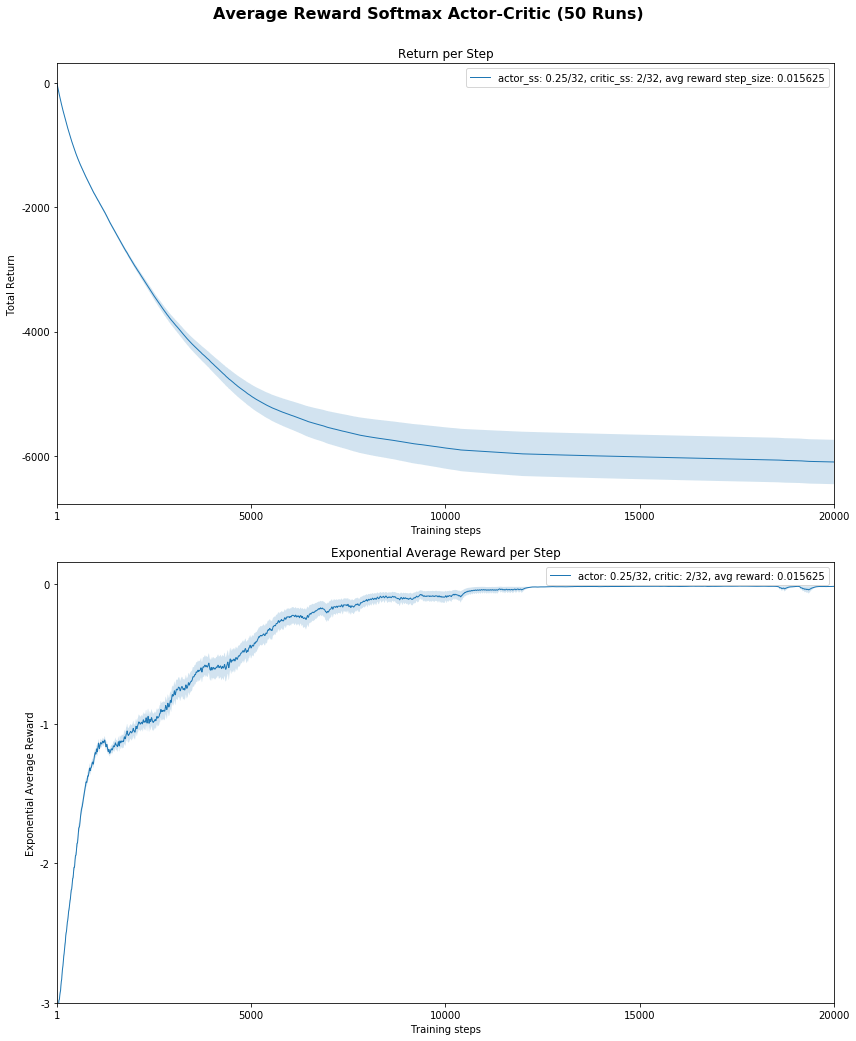

In [10]:
# ---------------
# Discussion Cell
# ---------------

#### Run Experiment

# Experiment parameters
experiment_parameters = {
    "max_steps" : 20000,
    "num_runs" : 50
}

# Environment parameters
environment_parameters = {}

# Agent parameters
# Each element is an array because we will be later sweeping over multiple values
# actor and critic step-sizes are divided by num. tilings inside the agent
agent_parameters = {
    "num_tilings": [32],
    "num_tiles": [8],
    "actor_step_size": [2**(-2)],
    "critic_step_size": [2**1],
    "avg_reward_step_size": [2**(-6)],
    "num_actions": 3,
    "iht_size": 4096
}

current_env = PendulumEnvironment
current_agent = ActorCriticSoftmaxAgent


run_experiment(current_env, current_agent, environment_parameters, agent_parameters, experiment_parameters)
plot_script.plot_result(agent_parameters, 'results')

In [11]:
# ---------------
# Discussion Cell
# ---------------

## Test Code for experimental result ##
filename = 'ActorCriticSoftmax_tilings_32_tiledim_8_actor_ss_0.25_critic_ss_2_avg_reward_ss_0.015625_exp_avg_reward'
agent_exp_avg_reward = np.load('results/{}.npy'.format(filename), allow_pickle=True)
result_med = np.median(agent_exp_avg_reward, axis=0)

answer_range = np.load('correct_npy/exp_avg_reward_answer_range.npy', allow_pickle=True)
upper_bound = answer_range.item()['upper-bound']
lower_bound = answer_range.item()['lower-bound']

# check if result is within answer range
all_correct = np.all(result_med <= upper_bound) and np.all(result_med >= lower_bound)

if all_correct:
    print("Your experiment results are correct!")
else:
    print("Your experiment results does not match with ours. Please check if you have implemented all methods correctly.")
    
    

Your experiment results are correct!
